# Lab Assignment Two: Exploring Text Data

## 1. Business Understanding

Short Message Service, also known as SMS, is the one of the largest communication standards in the world. SMS is platform independent, and used by most mobile telephone companies in the world. Even though SMS reached its peak of 3.5 billion active users at the end of 2010, its legacy has not diminished. SMS shaped and inspired a revolution of text messaging web and mobile apps in the years since; the world's currently most famous messenger clients such as iMessage, WhatsApp, Facebook Messenger, and WeChat all drew inspiration from SMS.

In 2008, over 70 billion SMS texts were sent *per month* in the US alone. Unfortunately, a large portion of these texts are sent as unwanted, unwarranted advertisements. These unsolicited messages are called **spam**. Spam can be dangerous, because even though most tech savvy individuals can discern a real, genuine message, from malicious advertisements, many portions of the population cannot (especially the elderly and not tech savvy). Thus, it is important to accurately automate the process of filtering spam SMS from a user's phone in the first place.

The dataset we chose is an SMS Spam Collection Dataset, where each of the 5,574 messages are tagged according to being **spam**, or **ham** (legitimate). This data was collected in the first place in order to properly identify which words are commonly associated with spam messages. The document contains over 90,000 words. Once we begin modelling, our prediction algorithm would need to perform to at least a 50% usage rate in order to beat random. However, in an ideal world in which an automated system should filter out all messages, our team's personal goal would be to beat at least 90% to ensure a clean messaging client for all.

---

Link to Dataset: https://www.kaggle.com/uciml/sms-spam-collection-dataset/kernels

--- 

## 2. Data Encoding As Strings

In [1]:
import pandas as pd
import numpy as np
from html import parser

For this exploration of text data, we will be importing the standard pandas and numpy libraries. We are also importing an html parser because we saw some unescaped HTML encodings.

But first, let's have a look at our raw data.

### 2.1 Data Input as Strings

In [2]:
df = pd.read_csv('data/spam.csv', encoding = 'latin1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 2.2 Data Quality Verification

There are unwanted columns here, so we can drop those and name the two relevant column names appropriately. Furthermore there are some unescaped HTML encodings, such as "&lt" (<) and "&gt" (>). Upon visualizing frequencies, we saw that 'lt' and 'gt' were appearing as top words. So we can get rid of them.

In [3]:
# Drop the empty columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Rename the columns
df = df.rename(index=str, columns={"v1": "classification", "v2": "message"})

# Remove HTML encodings
df['message'] = df['message'].apply(parser.unescape)
df.head()

,classification,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As a further step to verify data quality, we also wish to remove stop words. Stop words such as "a", "the", "this", can muddy the data by presenting the viewer frequent, but **unmeaningful** words. In the following two data representations, bag of words and tf-idf, we will remove stop words.

### 2.3 Bag of Words Representation

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
bag_of_words = count_vect.fit_transform(df['message']) # sparse matrix
print(bag_of_words.shape) # this is a sparse matrix
print('=========')
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vect.get_feature_names())
df_bag_of_words.tail()

(5572, 8403)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first way we have represented our data is through "bag of words". In  the bag of words representation, for each sentence, we have created a table of frequencies at which words appear. Each feature can be considered a unique vocabulary in the dataset, and the values each cell represent the number of occurrences of that word in the specific sentence.

### 2.4 tf-idf Representation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf_vect.fit_transform(df['message'])
df_tfidf = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df_tfidf.tail()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In our second representation of our text dataset, we have represented our data through a spase encoded tf-idf matrix. The difference between bag of words and tf-idf is that in tf-idf, the value in each cell corresponds to a word's overall "importance" to its document. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in all the documents together. Therefore, we might see the frequency of our top words change with a tf-idf representation.

### 2.5 Bag of Words and tf-idf Representations Compared

Because the top frequencies of words can change based on the representation, let's first take a look at any differences regarding the most frequent words found in the dataset.

In [22]:
print("Bag of Words:")
print(df_bag_of_words.sum().sort_values().iloc[::-1].head(10))
print("========================")
print("tf-idf:")
print(df_tfidf.sum().sort_values().iloc[::-1].head(10))

Bag of Words:
ur      385
just    371
ok      292
free    284
ll      269
know    261
good    245
like    245
got     239
day     229
dtype: int64
tf-idf:
ok       103.056455
ll        80.260218
just      72.103582
come      66.628517
ur        64.232346
good      60.228079
know      59.218811
time      56.770212
sorry     56.443346
like      56.083141
dtype: float64


There are a few key differences to spot. In the bag of words representation, the top most frequent word was "ur". However, in the tf-idf representation, "ur" was only the 5th most frequent word. This means that although "ur" had the highest overall frequency, it was not the most relevant term because it's frequency in appearance in the documents was not as high as a term like "ok".

As you can see, a term like "ok" actually ended up rising to the top of the rankings in the tf-idf representations because the frequency at which it appeared in different documents was high enough to make it the most relevant term.

Though its interesting to examine the top words, our objective is to determine some of the key characteristics of both spam and ham messages. Let's take a look at both categories individually.

In [51]:
# BAG OF WORDS: calculate the most frequently used words in ham texts and spam texts
df_ham = df[df['classification'] == 'ham']
df_spam = df[df['classification'] == 'spam']

df_ham_bagofwords = pd.DataFrame(data=count_vect.fit_transform(df_ham['message']).toarray(), columns=count_vect.get_feature_names())
df_spam_bagofwords = pd.DataFrame(data=count_vect.fit_transform(df_spam['message']).toarray(), columns=count_vect.get_feature_names())

print("Bag of words:")
print("=============")
print(" Ham: ")
print(df_ham_bagofwords.sum().sort_values().iloc[::-1].head(10))
print("=============")
print(" Spam: ")
print(df_spam_bagofwords.sum().sort_values().iloc[::-1].head(10))

Bag of words:
 Ham: 
just    293
ok      287
ll      265
ur      241
know    236
good    233
got     232
like    232
come    227
day     209
dtype: int64
 Spam: 
free      224
txt       163
ur        144
mobile    127
text      125
stop      121
claim     113
reply     104
www        98
prize      93
dtype: int64


By breaking the categories into spam and ham and looking at them individually, we begin to see a clearer distinction between the spam messages and the ham messages. For the most part, all the top words in Spam seem to use enticing "bait" words such as "*free*", "*claim*", "*prize*", with relevant words of action such as "*reply*" and "*txt*".

On the other hand, the most frequent words used in ham messsages are comprised mostly of common human communication words.

In [8]:
# Top 10 tfidf ranked words for spam and ham

df_ham_tfidf = pd.DataFrame(data=tfidf_vect.fit_transform(df_ham['message']).toarray(),columns=tfidf_vect.get_feature_names())
df_spam_tfidf = pd.DataFrame(data=tfidf_vect.fit_transform(df_spam['message']).toarray(),columns=tfidf_vect.get_feature_names())

print("tf-idf:")
print("=============")
print(" Ham: ")
print(df_ham_tfidf.sum().sort_values().iloc[::-1].head(10))
print("=============")
print(" Spam: ")
print(df_spam_tfidf.sum().sort_values().iloc[::-1].head(10))

tf-idf:
 Ham: 
ok       100.588134
ll        78.136591
come      65.104935
just      63.790758
good      57.677359
sorry     55.127252
know      54.800389
home      54.167186
got       53.961100
time      53.482410
dtype: float64
 Spam: 
free      26.521199
txt       18.486193
mobile    18.175171
ur        18.087196
text      17.024345
claim     16.774821
stop      16.039172
prize     15.996415
reply     15.478503
www       13.437777
dtype: float64


Listing the top 10 tf-idf ranked words only reinforces the division in vocabulary when comparing spam vs. ham. It is interesting to point out the consistency of "free" in spam. Because tf-idf accounts for term frequency across all documents in the corpus, seeing "free" at the top of both lists indicates that most spam texts are baiting unsuspecting recipients with a "free" reward.

Another interesting distinction to point out with Ham is the absence of "ur". In bag of words ham, the term "ur" was the 4th most frequent word in ham texts, but in tf-idf ham, it is absent from the top 10. This likely means that there are small amounts of texts that have a high frequency of "ur". With the spam messages, however, "ur" remained in the top 10 of tf-idf ranked words. This indicates that most of the "spam" texts use language that speaks directly *at* the recipient, most likely telling them to claim their prize.

## 3. Data Visualization

### 3.1 A Few Numerical Statistics to Start

Let's start off with a couple quick numerical statistics about our data before diving into visualizations.

In [50]:
percent_spam = round((len(df_spam) / len(df)) * 100, 2)
percent_ham = round((len(df_ham) / len(df)) * 100, 2)

print("Percent SPAM:",str(percent_spam) + "%")
print("Percent HAM: ",str(percent_ham) + "%")

Percent SPAM: 13.41%
Percent HAM:  86.59%


13.41% of our dataset's entries are spam. At a high level, this seems reasonable enough to classify texts as spam vs not spam, without overfitting a model too heavily towards spam.

In [53]:
df_vp = df.copy()
df_vp["char_count"] = df_vp["message"].apply(lambda x: len(x))
df_vp["word_count"] = df_vp["message"].apply(lambda x: len(x.split()))
df_vp.head()

,classification,message,char_count,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [55]:
print("Ham chars: ", df_vp[df_vp['classification'] == "ham"]['char_count'].mean()/df_vp[df_vp['classification'] == "ham"]['word_count'].mean())
print("Spam chars:", df_vp[df_vp['classification'] == "spam"]['char_count'].mean()/df_vp[df_vp['classification'] == "spam"]['word_count'].mean())

Ham chars:  4.968927872967687
Spam chars: 5.8221361620923835


The above ratios tell us that spam messages, on average, contain words that are ~1 character longer than ham messages.


In [58]:
df_vp[df_vp['classification'] == "ham"].describe()

,char_count,word_count
count,4825.000000,4825.000000
mean,70.561865,14.200622
std,57.336442,11.424511
min,2.000000,1.000000
25%,33.000000,7.000000
50%,52.000000,11.000000
75%,91.000000,19.000000
max,910.000000,171.000000


It is interesting to point out that the mean word count of the ham message is 14.2 words long...

In [57]:
df_vp[df_vp['classification'] == "spam"].describe()

,char_count,word_count
count,747.000000,747.000000
mean,138.866131,23.851406
std,29.183082,5.811898
min,13.000000,2.000000
25%,132.500000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


...while the mean word count of the spam message is 23.85 words long, a significant length more. Perhaps this could represent how in real life, spam messages tend to be singular messages that are a bit longer. On the other hand, normal humans are interacting with each other, it is common behavior to reduce the length of each message, but send a few messages in quick succession to convey a full message.

### 3.2 Statistical Summaries Visualized

We first decided to visualize our data by examining the lengths of messages in both spam and ham plots, to try and spot any defining differences between the two.

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# remove extreme outliers, so that graphing the violinplots look better
df_vp = df_vp[df_vp['message'].map(len) < 250]

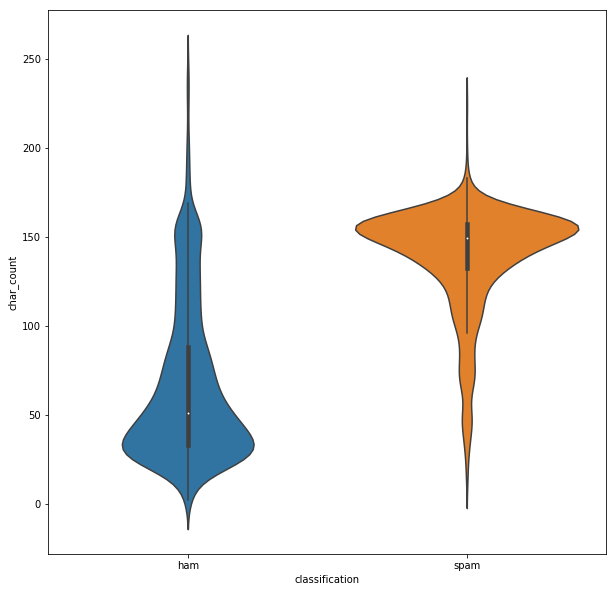

In [61]:
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="classification", y="char_count", data=df_vp)
plt.show()

In first plotting character counts, we can immediately tell a clear difference between the length of ham and spam messages. Ham messages have a higher frequency of points grouped around a lower character count. On the other hand, spam messages display just the opposite behavior, grouped around a higher character count.

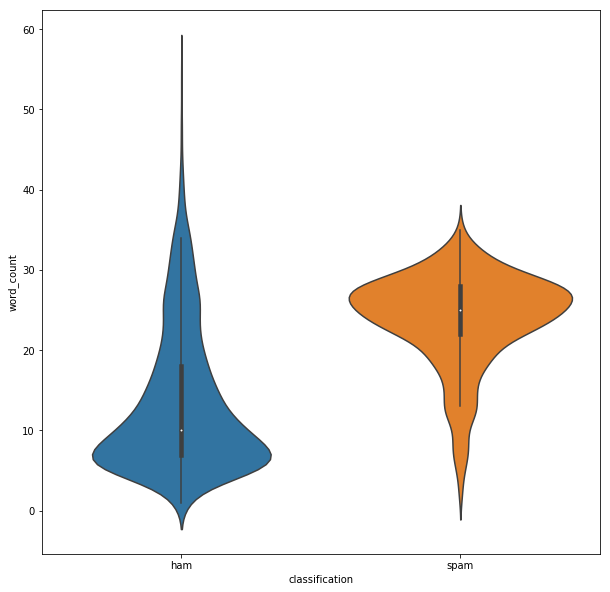

In [63]:
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="classification", y="word_count", data=df_vp)
plt.show()

By using a violin plot, we can ultimately dtermine that ham messages are much more likely to be shorter than spam. The mean character length for spam is (139-71) = 68 chracters greater than Ham messages. This this allows us to infer that spam messages are longer because spammers/scammers need more text in order to fool their subjects. While people normally comminicate with succinct messages.

Note: The character counts that go well above the SMS limit of 160 are concatenated messages provided in the dataset.

### 3.3 Most Common Relevant Words

### 3.4 Other Visualizations

## 4. Word Cloud

In [9]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

spam.png


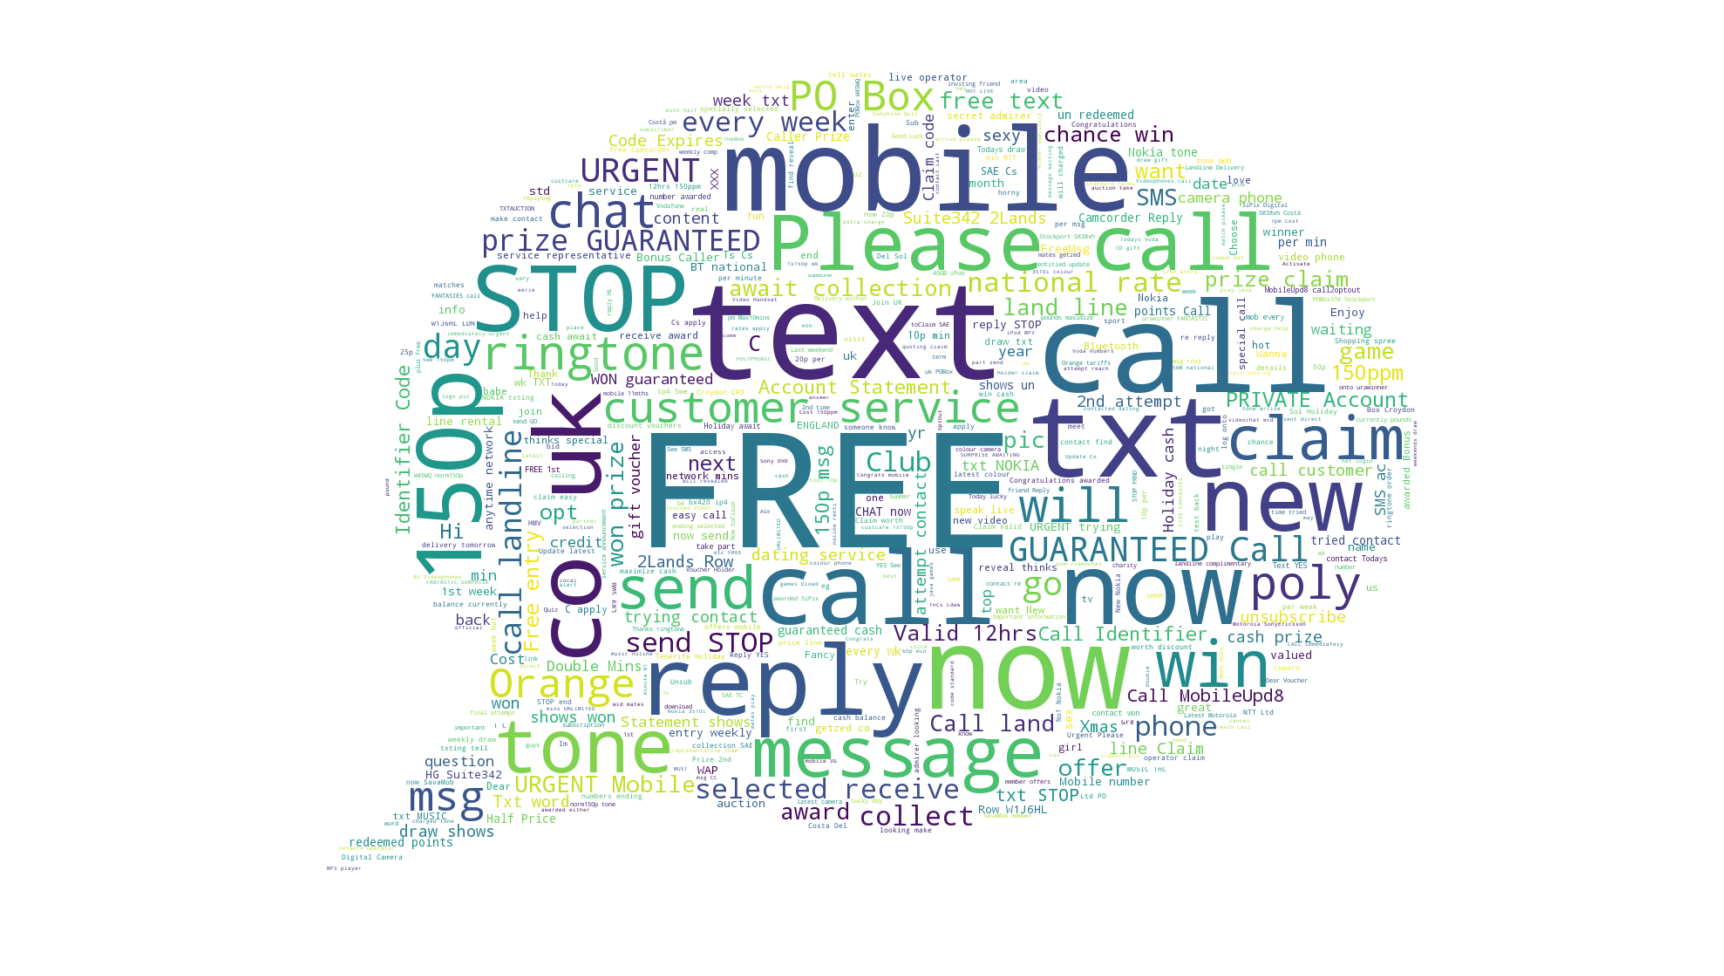

ham.png


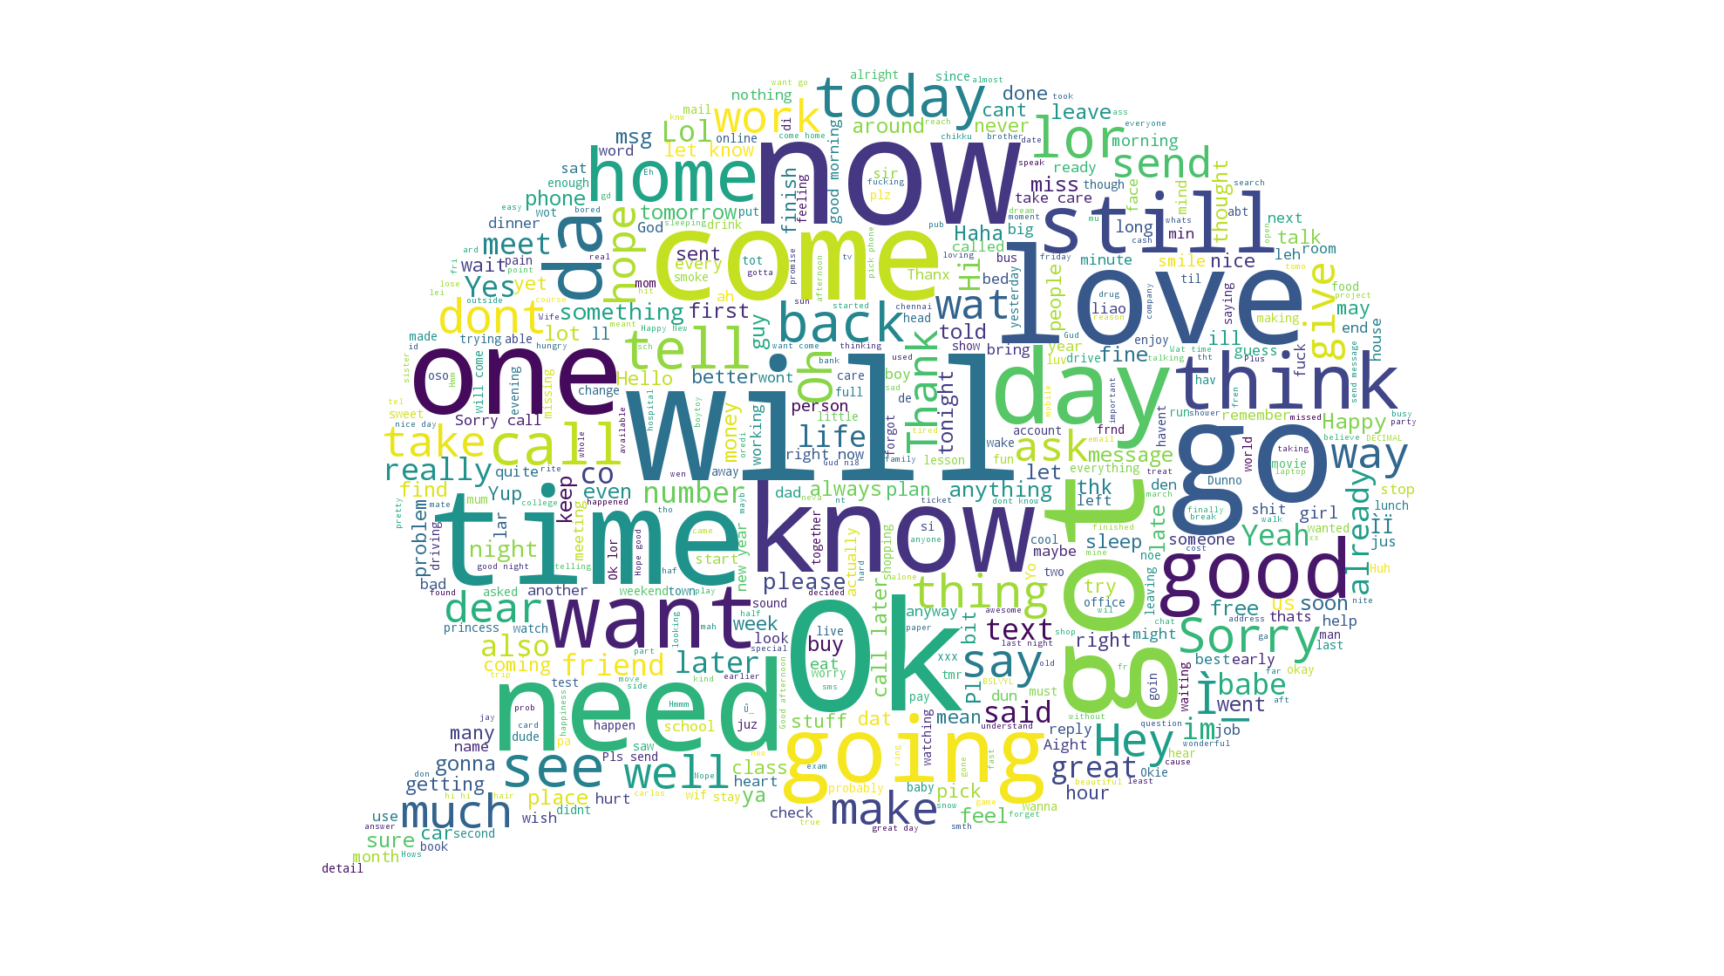

all.png


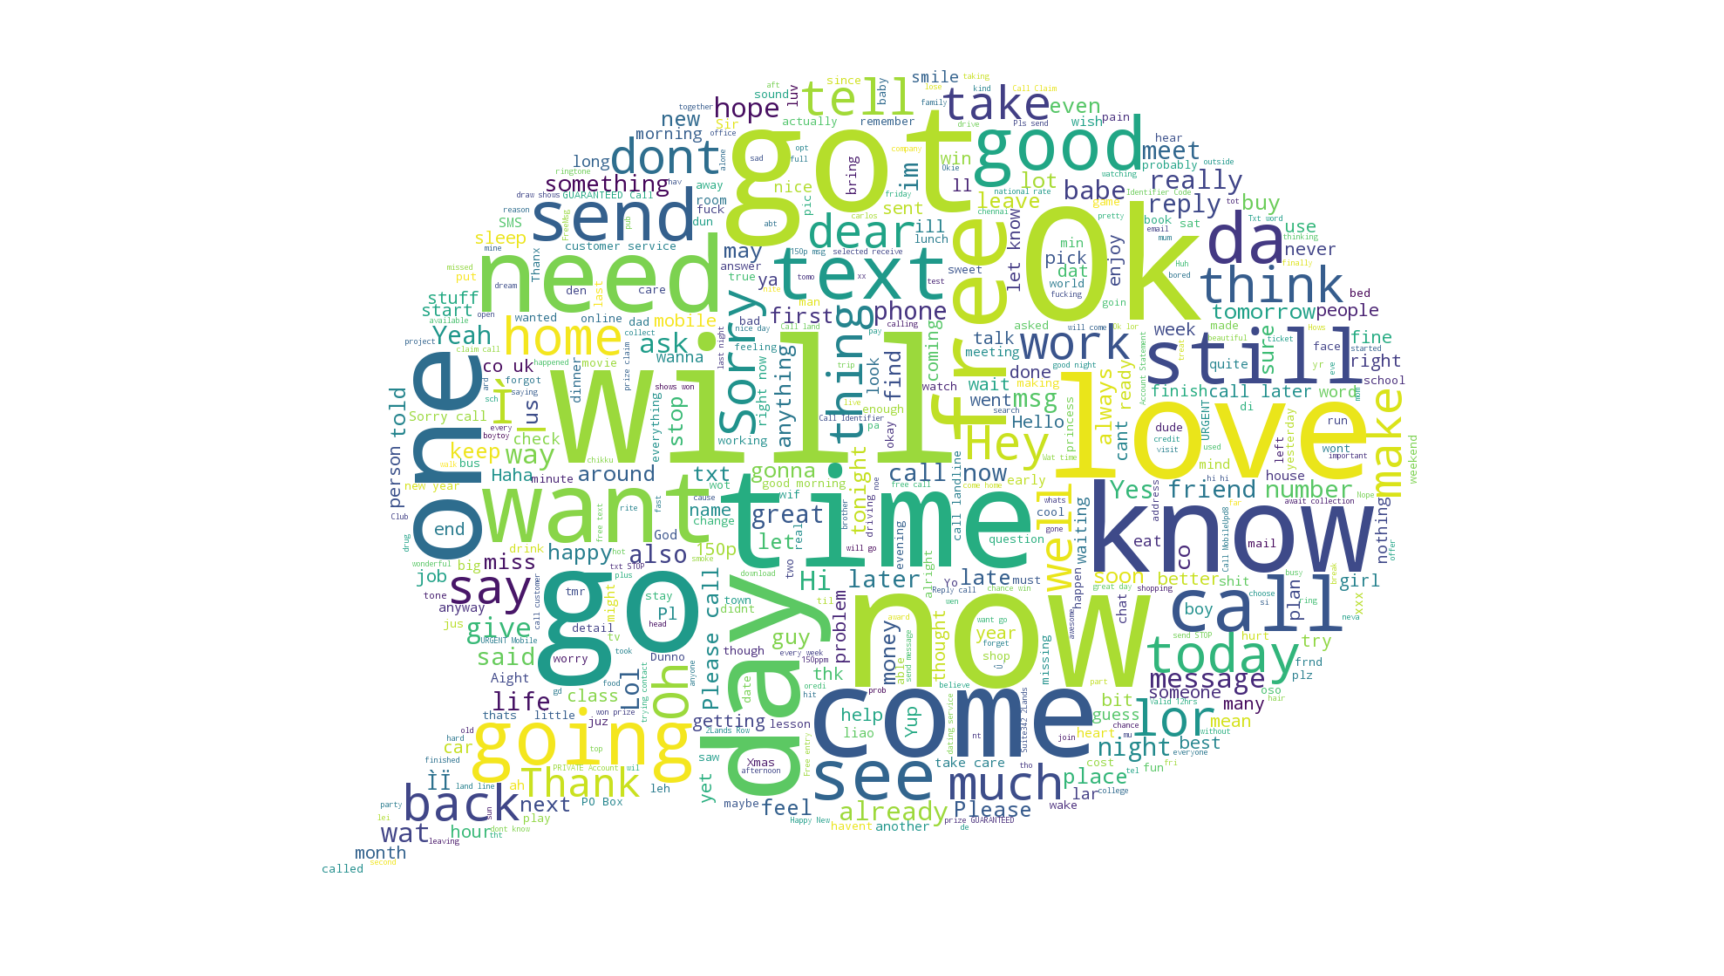

In [15]:

for df_col_wc, outFile in ((df[df["classification"] == "spam"]["message"],"spam.png",),
                       (df[df["classification"] == "ham"]["message"], "ham.png",),
                       (df["message"], "all.png",),):
    print(outFile)
    
    plt.figure(figsize=(30,30))

    # Read the whole text.
    text = ' '.join(df_col_wc)
    sms_mask = np.array(Image.open("data/black_sms.png"))
    stopwords = set(STOPWORDS)
    stopwords.add("lt")
    stopwords.add("gt")
    stopwords.add("ur")
    
    wc = WordCloud(background_color="white", max_words=500, mask=sms_mask,
               stopwords=stopwords)
    # generate word cloud
    wc.generate(text)

    # store to file
    wc.to_file("data/"+outFile)

    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

We showed the word cloud in 3 different ways:

1. The Spam subsection prominently shows words that we would relate to spam; Words like "FREE", "call, "now" and "win"
2. The Ham (non-spam) subsection contains words we would interpret as more "personal". Words like: "love", "home" and "will"
3. The Entire corpus does not seem to have many words that are also categorized as Spam. This is not surprising, sonsidering 85% on of the text data was classified as Ham/Not-spam.